# Naive Bayes

#### Author: Assaf Attias

## 1. Classifying Digits
In this part we will test digits classification on the MNIST dataset, using Bernoulli Naive Bayes (a generative model), in contrast to the Multivariate Logistic Regression (a discriminative model) we used before.

The MNIST dataset contains 28x28 grayscale images of handwritten digits between 0 and 9 (10 classes). For mathmatical analysis clarity, and for matching expected API, each image faltten to create a 1D array with 784 elements.

### Loading the MNIST dataset
Load the MNIST data set. The digits dataset is one of datasets scikit-learn comes with that do not require the downloading of any file from some external website. Use 
```
mnist = sklearn.datasets.fetch_mldata('MNIST original')
```
to fetch the original data. You may set the `data_home` to where you wish to download your data for caching. Each image is already transformed into a 1D integer array $x\in [0,255]^{784}$, and the corresponding label is an integer $y\in [0,9]$.

Plot a single sample of each digit as the original image, so you get a feeling how the data looks like.

Finally, divide your data into train and test sets, using 1/7 of the data for testing.

---
**Note 1:** Using `digits = sklearn.datasets.load_digits()` will only fetch a very small sample of the original set, with images resized to 8x8. This preprocessing of the data reduces dimensionality and gives invariance to small distortions - however, we will use the original data in this exercise. Feel free to test the proformance of the algorithms below on the preprocessed data as well.

**Note 2:**
Since ML-Data is deprecated, you may wish to use something like this:
>```
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(x_train.shape[0], 784)
x_test = x_test.reshape(x_test.shape[0], 784)
```

11493376/11490434 [==============================] - 0s 0us/step


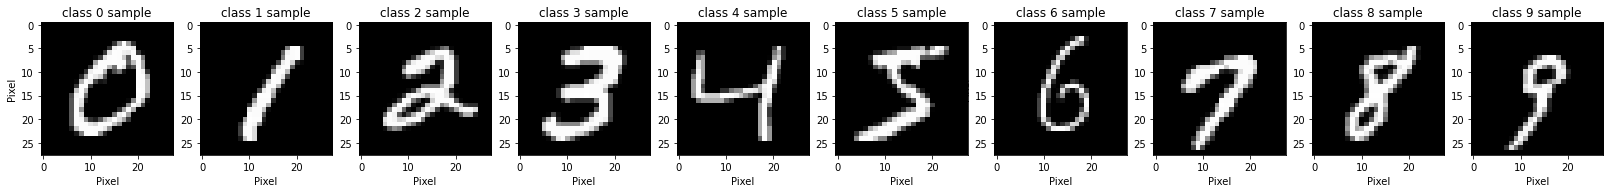

In [ ]:
# imports
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np

# load dataset (data already divided 10000 for test and 60000 for train)
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# plot samples from each digit
fig = plt.figure(figsize=(28, 28))
indicies = [1,3,5,7,2,0,18,15,17,19] # indicies for each digit, ordered by class
for i in range(len(indicies)):
  fig.add_subplot(1,10,i+1)
  plt.title("class " + str(i) + " sample"),plt.xlabel("Pixel"), plt.ylabel("Pixel") 
  plt.imshow(x_train[indicies[i]],cmap='gray', vmin=0, vmax=255)
plt.show()
# transform (into 1-D) 
x_train = x_train.reshape(x_train.shape[0], 784)
x_test = x_test.reshape(x_test.shape[0], 784)


### Bernoulli Naive Bayes
If we know how the digits are generated, then we know how to classify them (simply choose the digit class which will maximize the posterior probability) --- but which model should we use for describing the digits generation?

In this part we will try a very simplified model of digits creation (which is obviously not the same as the "real" model), using a Naive Bayes over an underlying Bernoulli distribution --- that is, we will assume that given a digit class, the pixels of the images are the result of independent coin flips, each with its own "head" probability.

Note that since we assume each pixl is either 0 (black) or 1 (white), we will need to adjust (preprocess) our data accrodingly (see below).

So, the model is stated as follows:
$$
\begin{align}
\text{Domain} && x \in \{0,1\}^{784} \\
\text{Prior} && \pi_j = \Pr(y=j) \\
\text{Likelihood} && P_j(x) = \Pr(x | y=j) \\
\end{align}
$$

Where for each $i\in 0\ldots 784$ it holds that
$$
P_{ji}(x_i) = \Pr(x_i | y=j) =
\begin{cases}
p_{ji} & \text{if } x_i=1 \\
1-p_{ji} & \text{if } x_i=0 \\
\end{cases}
$$


#### Question 1
Write the classification rule based on this Naive Bayes model. 
How would you esitmate each of the parameters of the model based on the trainning data? 


**Bonus:** Think of edge cases which may effect your estimator in an undesired way.

#### Answer 1
***
We Want to estimate the most probable class given a sample (MAP - Maximum A Posteriori).
<br>
$\ \ \
C_{MAP} = \underset{c_j \in C}{\textrm{argmax}} [P(c_j | x_1, x_2, ... , x_n)] $
<br>
Navie Bayes Model take advantage of Bayes Theorem (we can also remove the Divider because it would not change the maximum argument).
<br>
$\ \ \
C_{MAP} = \underset{c_j \in C}{\textrm{argmax}} [P(C_j) * P(x_1, x_2, ... , x_n | c_j)] $
<br>
Naive Bayes also assume that each attribute  $x_i$ is independent of the other attributes if we know the value of $c_j$ (Independence Assumption)
<br>
$\ \ \
C_{MAP} = \underset{c_j \in C}{\textrm{argmax}} [ P(C_j) \prod \limits _{i} P(x_i | c_j)] $
<br>
<br>
***When we translate the classification rule to this domain we get:***
<br>
$\ \ \
C_{MAP} = \underset{c_j \in C}{\textrm{argmax}} [ \pi_j \prod \limits _{i} P_{ji}(x_i)] $
<br>
<br>

***Estimation of each parameter:***

1. $p_{ji} = \frac{\text{# of samples with class} \ c_j \ \text{and} \ x_i=1 \ \text{in the dataset}}{\text{# of samples with class} \ c_j \ \text{in the dataset}}$


2. $\pi_j = \frac{\text{# of samples with class} \ c_j \ \text{in the dataset}}{\text{# of samples in the dataset}}$

**Bonus:**<br>
The Edge Cases that may effect the estimator:
1. samples that the digit relative position is not centered (close to the edge)
2. samples that are relative samll/big digits than normal
3. samples that has digit written in a rotated way
4. samples with digits that can be written in several ways (1-with/out the line at the bottom, 7 - with the line in the middle, 0 - with the line in the diagnoal...)
***

#### Question 2
Run a Naive Bayes classifier on the training data and apply predictions on the test data. Use the [sklearn.naive_bayes.BernoulliNB](http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.BernoulliNB.html) implementation (see the [source code for sklearn.naive_bayes](https://github.com/scikit-learn/scikit-learn/blob/master/sklearn/naive_bayes.py) for details).

Remember we need to preprocess the data in this case such that each pixel would become either black (0) or white (1). For this, use the `binarize` parameter of the implementation. Set this value to $0$ (this is the default), which in this case would mean every pixel with non-zero value will be set to 1.

1. Plot the mean image of each class (estimated $\hat{p}_{ji}$) and generate one sample of each class (remember, you can do this since this is a generative model). You will need to access the `feature_log_prob_` attribute of the trained model.

2. Plot the confusion matrix of your classifier, as claculated on the test data (it is recommended to use [sklearn.metrics.confusion_matrix](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)). Calculate the total accuracy (fraction of correctly classified images), and summarize the results in your own words.

3. Think of a way you can find the optimal threshold of the binarization part. **There is no need to actually perform this task --- just describe what you would have done.**


#### Answer 2
***
2. we can get the total accuracy from the confusion matrix if we sum the values at the left diagnoal, total accuracy of the model is 84% on test samples, we can say the prediction model is general (not overfited) and we can say that our initial assumption was good (independent pixels with bernoulli distribution).

3. We can use a method that takes advantage of cross validation, we can try several values, for each value we will use cross validation to get the avrage score of the model and than we can choose the value that maximaze the score.
for example to this method we can use 'GridSearchCV' an algorithm that can find the best score (and the best parameter value) using cv for multiple parameters combined.
Then we can divide the parameter value range to sections and using this algorithm find the best one (and the optimal value in it)

***

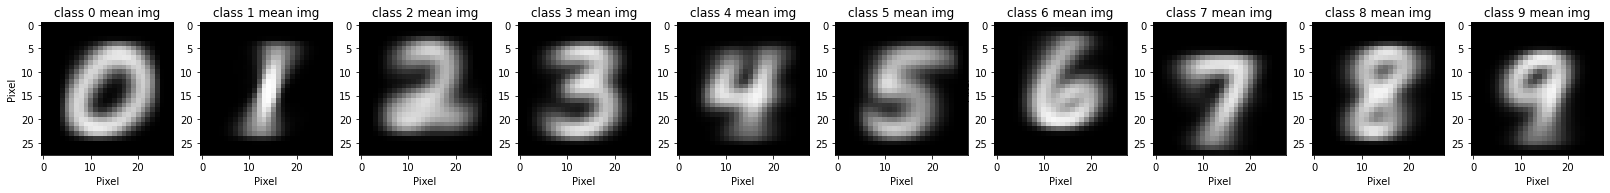

Confusion Matrix:
[[ 887    0    4    7    2   41   16    1   22    0]
 [   0 1085   10    5    0    9    6    0   19    1]
 [  19    8  852   29   17    4   32   14   55    2]
 [   5   15   34  844    0   13    9   15   49   26]
 [   2    6    4    0  795    4   21    1   23  126]
 [  23   12    7  129   30  627   16    8   21   19]
 [  18   18   15    2   13   35  851    0    6    0]
 [   1   24   14    4   15    0    0  871   27   72]
 [  16   23   13   76   17   22    7    6  758   36]
 [   9   13    5    9   74    8    0   24   24  843]]
Total Accuracy:  0.8413


In [ ]:
# imports
import sklearn.preprocessing
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import confusion_matrix

# Train
model = BernoulliNB()
model.fit(x_train,y_train)
#plot mean image for each class
fig = plt.figure(figsize=(28, 28))
for c in range(len(model.feature_log_prob_)):
  fig.add_subplot(1,10,1+c)
  plt.title("class " + str(c) + " mean img"),plt.xlabel("Pixel"), plt.ylabel("Pixel") 
  plt.imshow((255 * np.exp(model.feature_log_prob_[c])).reshape((28,28)),cmap='gray', vmin=0, vmax=255) # convert prob into pixel value in gray scale
plt.show()
#plot confusion matrix
c_matrix = sklearn.metrics.confusion_matrix(y_test, model.predict(x_test))
print("Confusion Matrix:")
print(c_matrix)
# calculate accuracy
acc = 0
for i in range(len(c_matrix)):
  acc += c_matrix[i][i]
acc /= len(y_test)
print("Total Accuracy: " , acc)

## 2. Classifing Text Documents using Multinomial Naive Bayes
In this exercise you will classify the "20 newsgroups" data set using your own naive bayes classifier and compare to the scikit learn built in version.

The 20 newsgroups dataset comprises around 18000 newsgroups posts on 20 topics split in two subsets: one for training (or development) and the other one for testing (or for performance evaluation). The split between the train and test set is based upon messages posted before and after a specific date.

### You task
Implement the barebone class provided: `NaiveBayes(BaseEstimator, ClassifierMixin)` and implement its `fit`, `predict` and `predict_proba` methods.

Then follow next anlysis guidlinnes using the implemented class for train and test classifier:
* Load the **train** data using `from sklearn.datasets import fetch_20newsgroups`. remove headers, footers and quotes (see documentation)
* Use `sklearn.feature_extraction.text import CountVectorizer` to count words (stop_words='english')
* use `sklearn.pipeline.make_pipeline` to chain the vectroizer and model.
* note: limit the vocuabolary size if you suffer memory issues
* compare the accuracy over the **test** data. You can use `accuracy_score, classification_report`
* compare to the built in `sklearn.naive_bayes.MultinomialNB`
* compare to `TfidfVectorizer` preprocessing (you can use the built in model for doing the analysis)
* plot the learning curve - is the model in the bias or variance regime (you can use the built in model for doing the analysis)
* optimize performance in respect to vectorizer hyper parameters (e.g. max_features, max_df etc.).


== Compare Models with CountVectorizer ============================================
My (NaiveBayes) Acc:  0.6343600637280935
Other (MultinomialNB) Acc:  0.6343600637280935
-------------------------------------------------
My (NaiveBayes) Report:
                           precision    recall  f1-score   support

             alt.atheism       0.65      0.30      0.41       319
           comp.graphics       0.58      0.69      0.63       389
 comp.os.ms-windows.misc       0.40      0.01      0.01       394
comp.sys.ibm.pc.hardware       0.53      0.72      0.61       392
   comp.sys.mac.hardware       0.74      0.56      0.64       385
          comp.windows.x       0.56      0.81      0.66       395
            misc.forsale       0.85      0.69      0.76       390
               rec.autos       0.82      0.70      0.76       396
         rec.motorcycles       0.91      0.62      0.73       398
      rec.sport.baseball       0.94      0.74      0.83       397
        rec.sport.hockey  

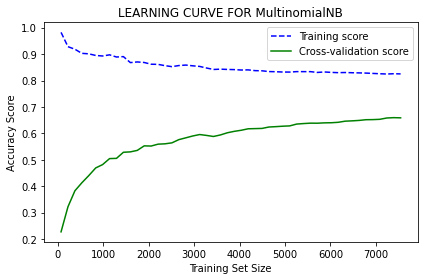

We can say that we are we have LOW bias (the cureves closer to the top - good accuracy for both)
We can say that we are we have LOW variance (the cureves relative close to each other - same results for test and train, no overfit)

Best score: 0.721
Best parameters set:
	tfidfvectorizer__max_df: 0.8
	tfidfvectorizer__max_features: 50000
-----------------------------
All Test Results (Mean Score, STD score):
0.710 (+/-0.019) for {'tfidfvectorizer__max_df': 0.8, 'tfidfvectorizer__max_features': 10000}
0.720 (+/-0.016) for {'tfidfvectorizer__max_df': 0.8, 'tfidfvectorizer__max_features': 20000}
0.721 (+/-0.015) for {'tfidfvectorizer__max_df': 0.8, 'tfidfvectorizer__max_features': 50000}
0.719 (+/-0.016) for {'tfidfvectorizer__max_df': 0.8, 'tfidfvectorizer__max_features': None}
0.710 (+/-0.019) for {'tfidfvectorizer__max_df': 0.9, 'tfidfvectorizer__max_features': 10000}
0.720 (+/-0.016) for {'tfidfvectorizer__max_df': 0.9, 'tfidfvectorizer__max_features': 20000}
0.721 (+/-0.015) for {'tfid

In [ ]:
#imports
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils.extmath import safe_sparse_dot
from sklearn.preprocessing import binarize, LabelBinarizer
from scipy.sparse import csr_matrix

class NaiveBayes(BaseEstimator, ClassifierMixin):

  """
    Fit Naive Bayes according to a given x, y
      Parameters:
        x : csr_matrix (#samples, #features), Training vectors.
        y : array of shape (#samples,), Target values.
      Returns: 
        self : object
  """
  def fit(self, x, y):
    # convert y into binary vec label matrix for count
    matrix_y = LabelBinarizer().fit_transform(y)
    # init
    self.class_names = np.unique(y)
    n_class = len(self.class_names)
    n_feature = x.shape[1]
    self.count_class = np.zeros(n_class)
    self.count_feature = np.zeros((n_class,n_feature))
    # Count Items and store
    self.count_class += matrix_y.sum(axis=0) # Count number of sample for each class
    self.count_feature += x.transpose().dot(matrix_y).T # Count number of samples with value in feature xi for each class. becuse matrix_y is label binarized the dot product will sum the count for each class (multiple transpose needed in order to use the method dot of csr_matrix) 
    # laplace correction
    count_feature_laplace = self.count_feature + 1
    count_total_laplace = count_feature_laplace.sum(axis=1).reshape(-1, 1)
    # Calculate Log Probs, better than multiple very small probs
    self.log_prob_class = np.log(self.count_class) - np.log(self.count_class.sum())
    self.log_prob_feature = np.log(count_feature_laplace) - np.log(count_total_laplace)

    return self

  """
    Return log-probability of test samples x for each class.
      Parameters:
        x : csr_matrix (#samples, #features)
      Returns:
        res : array of shape (#samples, #classes)
  """
  def predict_log_proba(self, x):
    # dot product on log of probs will multiply the x feature count with the x feature log-prob and sum all of them for each class (sum of logs-probs = multiply probs) 
    res = x.dot(self.log_prob_feature.T)
    # finaly add the log prob of the classes to each sample vector in res
    return res + self.log_prob_class

  """
    Perform classification on an array of test samples X and return predicted targets.
      Parameters:
        x : csr_matrix (#samples, #features)
      Returns:
        res : ndarray of shape (#samples,)
    """
  def predict(self, x):
      return self.class_names[np.argmax(self.predict_log_proba(x), axis=1)]

#############################################################
# Imports
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import learning_curve, GridSearchCV
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
"""
  compare a given model and ower NaiveBayes model using the 20newsgroups dataset
  and and use a given vectorizer in the pipeline to transform the data
  this method will print the accuracy_score and classification report for both models
"""
def compareModels(vectorizer, otherModel):
  # init
  other_pipeline = make_pipeline(vectorizer, otherModel)
  my_pipeline = make_pipeline(vectorizer, NaiveBayes())
  # prepare data
  x_doc_train, x_doc_test = news_train.data, news_test.data
  y_doc_train, y_doc_test = news_train.target, news_test.target
  # train
  other_pipeline.fit(x_doc_train, y_doc_train)
  my_pipeline.fit(x_doc_train, y_doc_train)
  # eval
  print("My (NaiveBayes) Acc: ", accuracy_score(y_doc_test,my_pipeline.predict(x_doc_test)))
  print("Other (MultinomialNB) Acc: ", accuracy_score(y_doc_test, other_pipeline.predict(x_doc_test)))
  print("-------------------------------------------------")
  print("My (NaiveBayes) Report:\n", classification_report(y_doc_test,my_pipeline.predict(x_doc_test),target_names=news_train.target_names))
  print("-----------------------------")
  print("Other (MultinomialNB) Report:\n", classification_report(y_doc_test, other_pipeline.predict(x_doc_test),target_names=news_train.target_names))
  

# Get Data set
news_train = fetch_20newsgroups(subset='train',remove=('headers', 'footers', 'quotes'))
news_test = fetch_20newsgroups(subset='test',remove=('headers', 'footers', 'quotes'))
# Init model and vectorizers
vectorizer = CountVectorizer(stop_words='english')
vectorizer2 = TfidfVectorizer(stop_words='english')
model2 = MultinomialNB()
# Compare and Print tesults
print("== Compare Models with CountVectorizer ============================================")
compareModels(vectorizer,model2)
print("===================================================================================")
print("== Compare Models with TfidfVectorizer ============================================")
compareModels(vectorizer2,model2)
print("===================================================================================")
print("============================================")
print("results of compare:")
print("model compare = the accuracy of the models are the same")
print("vectorizer compare = TfidfVectorizer gives more accuracy then normal count")
print("============================================")
print()
# # Plot Learning curve
print("============================================")
pipeline = make_pipeline(vectorizer, model2)
sizes, training_scores, testing_scores = learning_curve(pipeline, news_train.data, news_train.target, cv=3, scoring='accuracy', train_sizes=np.linspace(0.01, 1.0, 50))
mean_training = np.mean(training_scores, axis=1)
Standard_Deviation_training = np.std(training_scores, axis=1)
mean_testing = np.mean(testing_scores, axis=1)
Standard_Deviation_testing = np.std(testing_scores, axis=1)
plt.plot(sizes, mean_training, '--', color="b",  label="Training score")
plt.plot(sizes, mean_testing, color="g", label="Cross-validation score")
plt.title("LEARNING CURVE FOR MultinomialNB")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()
print("We can say that we are we have LOW bias (the cureves closer to the top - good accuracy for both)")
print("We can say that we are we have LOW variance (the cureves relative close to each other - same results for test and train, no overfit)")
print("============================================")
print()
#
# # Optimize parameters
print("============================================")
tuned_parameters = {'tfidfvectorizer__max_features':[10000,20000,50000,None],'tfidfvectorizer__max_df':[0.8,0.9,1.0]}
grid_cv = GridSearchCV(make_pipeline(vectorizer2, model2), tuned_parameters)
grid_cv.fit(news_train.data, news_train.target)
print("Best score: %0.3f" % grid_cv.best_score_)
print("Best parameters set:")
best_parameters = grid_cv.best_estimator_.get_params()
for param_name in sorted(tuned_parameters.keys()):
  print("\t%s: %r" % (param_name, best_parameters[param_name]))
print("-----------------------------")
means = grid_cv.cv_results_['mean_test_score']
stds = grid_cv.cv_results_['std_test_score']
print("All Test Results (Mean Score, STD score):")
for mean, std, params in zip(means, stds, grid_cv.cv_results_['params']):
  print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
print("============================================")


### Bonus I (10 points)
#### Model interpretability
Find the most important features for a **specific** decision of a NB classifier.
Because the model has learned the prior $p(x_i|c)$ during the training, the contribution of an individual feature value can be easily measured by the posterior, $p(c|x_i)=p(c)p(x_i|c)/p(x_i)$
Implement a function which gets a scikit-learn NB model as input and returns $P(c|x_i)$:

`def calc_p_c_given_xi(model)`

Hint: Use the following model properties:

* `model.class_log_prior_`
* `model.feature_log_prob_`

Note: remember these are logs and you need to use np.exp and normalize to get $P(c|x_i)$ 
Another hint: use numpy built-in broadcasting property.

* Use the interpretation to examine errors of the classifier where $\hat{c}\ne c$. Which top words support the correct class and which support the wrong class? You can use the `print_txt` below to color words.

In [ ]:
import string
def print_txt(txt, hot, cold):
  """
  print the text, coloring hot and cold words with colors
  """
  cold_color='\x1b[41;37m{}\x1b[0m'
  hot_color='\x1b[42;37m{}\x1b[0m'
  def color(token):
    lower = str(token).lower()
    lower = lower.replace('\t','').replace('\n','')
    lower = lower.translate(string.punctuation)
    if (lower in hot) and (lower in cold):
      return mid_color.format(token)
    elif lower in hot:
      return hot_color.format(token)
    elif lower in cold:
      return cold_color.format(token)
    else:
      return token
  colored_txt = " ".join([color(token) for token in txt.split(' ')])
  print(colored_txt)
print_txt('This word support the first class but this the other', ['word'],['other'])

This word support the first class but this the other


In [ ]:
import string
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import make_pipeline
"""
  This method will creates and calculate a matrix that contains the probs: P(c|x_i)
  from a given model that has the attributes: class_log_prior_, feature_log_prob_
"""
def calc_p_c_given_xi(model):
  res = (model.class_log_prior_.reshape(-1,1) + model.feature_log_prob_)
  res = np.exp(res)  # eliminate log
  res /= res.sum(axis=0) # normalize
  return res

# print texts
"""
  This method will analyze document j and will print the top (num) words that supported
  the predicted class, true class and will print visualization of them in the txt 
"""
def show_error_doc(j, num=5):
  # init
  pred_class = y_pred[j]
  true_class = y_true[j]
  doc_j = x_txt[j]
  doc_xi_index = x_true[j, :].nonzero()
  hot = []
  cold = []
  # get words in doc
  word_bag = []
  for i in doc_xi_index[0]:
    word_bag.append({'w':convertIndexToWord[i],'feature_id':i})
  # divide words to cold/hot base on their value in p_c_given_xi
  for t in word_bag:
    if p_c_given_xi[true_class][t['feature_id']] > p_c_given_xi[pred_class][t['feature_id']]:
      hot.append({"word": t['w'], "prob": p_c_given_xi[true_class][t['feature_id']]})
    elif p_c_given_xi[true_class][t['feature_id']] < p_c_given_xi[pred_class][t['feature_id']]:
      cold.append({"word": t['w'], "prob": p_c_given_xi[pred_class][t['feature_id']]})
  # sort for rank
  hot_by_prob = sorted(hot, key=lambda i: i['prob'],reverse=True)
  cold_by_prob = sorted(cold, key=lambda i: i['prob'],reverse=True)
  # show results
  print("===========================================")
  print('doc index={}, true class={}, predicted class={}'.format(j, news_train.target_names[true_class], news_train.target_names[pred_class]))
  print("-------------------------------------------")
  print("Top Ranked Hot Word List: format: [Rank,Word,p_c_given_xi]")
  for i in range(num if num < len(hot_by_prob) else len(hot_by_prob)):
    print('[{},{},{}]'.format(i+1,hot_by_prob[i]['word'],hot_by_prob[i]['prob']))
  print("-------------------------------------------")
  print("Top Ranked Cold Word List: [Rank,Word,p_c_given_xi]")
  for i in range(num if num < len(cold_by_prob) else len(cold_by_prob)):
    print('[{},{},{}]'.format(i+1, cold_by_prob[i]['word'], cold_by_prob[i]['prob']))
  print("-------------------------------------------")
  print_txt(doc_j, [f['word'] for f in hot], [f['word'] for f in cold])
  print("===========================================")

# init and train
model2 = MultinomialNB()
vectorizer = CountVectorizer(stop_words='english')
pipeline = make_pipeline(vectorizer, model2)
pipeline.fit(news_train.data, news_train.target)

convertIndexToWord = {v:k for k, v in vectorizer.vocabulary_.items()}

# eliminate all good predictions
y_pred = pipeline.predict(news_test.data)
y_true = news_test.target
not_eql_ind = np.not_equal(y_pred, y_true)
x_txt = np.asarray(news_test.data)[not_eql_ind]
x_true = vectorizer.transform(x_txt).toarray()
y_pred = y_pred[not_eql_ind]
y_true = y_true[not_eql_ind]
# Get the coefficients of each feature
p_c_given_xi = calc_p_c_given_xi(model2)

n_prints = 4
for i in range(n_prints):
  show_error_doc(i)

doc index=0, true class=comp.windows.x, predicted class=comp.graphics
-------------------------------------------
Top Ranked Hot Word List: format: [Rank,Word,p_c_given_xi]
[1,compile,0.5454549498551828]
[2,linux,0.3460773425685404]
[3,displays,0.3363100586366084]
[4,header,0.27241621901512997]
[5,headers,0.18758740203356736]
-------------------------------------------
Top Ranked Cold Word List: [Rank,Word,p_c_given_xi]
[1,format,0.45910053033554116]
[2,faces,0.2289987394026789]
[3,dpg,0.21719442223906804]
[4,handle,0.15928769342642024]
[5,uncompressed,0.13542360739812495]
-------------------------------------------
I'm not familiar at all with the format of these "X-Face:" thingies, but
after seeing them in some folks' headers, I've *got* to *see* them (and
maybe make one of my own)!

I've got "dpg-view" on my Linux box (which displays "uncompressed X-Faces")
and I've managed to compile [un]compface too... but now that I'm *looking*
for them, I can't seem to find any X-Face:'s in anyo

### Bonus II (5 points)
#### How can you correct the analyzed error?

To read more about model interpretation, see the blogpost below and the tutorial:
* https://lilianweng.github.io/lil-log/2017/08/01/how-to-explain-the-prediction-of-a-machine-learning-model.html
* https://github.com/chanansh/right_but_why

Answer for 2nd bonus
1. With Weights to the features: Give more weight to the error words in the samples (documents) that belong to the correct class (or less weight to the words in samples that belongs to the wrong class).
2. add/clone samples (documents) with the same words (error words) and correct class in training so that the model can learn better that this words appears in the documents with the correct class.
